# Telecom Churn Case Study

## 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
# Reading the dataset
telecom_data = pd.read_csv("telecom_churn_data.csv" )
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# Inspect the shape of the dataset
telecom_data.shape

(99999, 226)

In [4]:
# Inspect the different columsn in the dataset
telecom_data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [5]:
cols = telecom_data.columns.tolist()
cols

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [6]:
# Check the summary of the dataset
telecom_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
# Check the info to see the types of the feature variables and the null values present
print(telecom_data[:100].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 171.9+ KB
None


## Filter High Value Customers

Since we will be dealing with **High Value Customers** only for tagging the churners and due to the data size (and due to lower machine configurations), we will filter out the high value customer records and work only on that dataset. 

**High Value Customers** are the customers those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (i.we. in the good phase).

For finding out the High value customers, we will need to operate on data columns containing recharge information.

In [8]:
## Creating new column which will give the "total data recharge amount".

telecom_data["total_rech_data_amt_6"] = telecom_data["total_rech_data_6"]  * telecom_data['av_rech_amt_data_6']
telecom_data["total_rech_data_amt_7"] = telecom_data["total_rech_data_7"]  * telecom_data['av_rech_amt_data_7']
telecom_data["total_rech_data_amt_8"] = telecom_data["total_rech_data_8"]  * telecom_data['av_rech_amt_data_8']
telecom_data["total_rech_data_amt_9"] = telecom_data["total_rech_data_9"]  * telecom_data['av_rech_amt_data_9']

In [9]:
## Dropping the "total_rech_data_amt_" and "av_rech_amt_data_" columns.

drop_columns = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

telecom_data.drop(drop_columns, axis= 1, inplace=True )

In [10]:
telecom_data.drop('mobile_number', axis= 1, inplace=True )

In [11]:
telecom_data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,

In [12]:
## Finding the average recharge amount of 6th and 7th month

total_recharge_6th = telecom_data["total_rech_amt_6"].fillna(0) + telecom_data["total_rech_data_amt_6"].fillna(0) 
total_recharge_7th = telecom_data["total_rech_amt_7"].fillna(0) + telecom_data["total_rech_data_amt_7"].fillna(0)

avg_amt_recharge_6and7 = (total_recharge_6th + total_recharge_7th)/2.0

In [13]:
## Taking 70% of the average recharge amount of 6th and 7th month

avg_amt_recharge_6and7_percentile_70 = np.percentile(avg_amt_recharge_6and7, 70.0)
print("70% of the average recharge amount of 6th and 7th month is: ", avg_amt_recharge_6and7_percentile_70)

70% of the average recharge amount of 6th and 7th month is:  478.0


In [14]:
## Filter the dataset for taking high value customers only.

telecom_data_high_value_customers = telecom_data[avg_amt_recharge_6and7>=avg_amt_recharge_6and7_percentile_70]

In [15]:
telecom_data_high_value_customers.shape

(30001, 221)

In [16]:
telecom_data_high_value_customers.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252

## 2: Data Cleaning and EDA

In [17]:
# We get info of these columns from Total columns in the dataset
# hence dropping these columns
 
drop_corr_list = ['loc_og_t2m_mou_6',
                'std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9',
                'std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9',
                'total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9',
                'loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9',
                'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9',
                'arpu_2g_9','count_rech_2g_9','count_rech_3g_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9',
                'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9',
                'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9',
                ]
telecom_data_high_value_customers.drop(drop_corr_list, axis=1, inplace = True)

In [18]:
dataTypeSeries = telecom_data_high_value_customers.dtypes
print(dataTypeSeries)

circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               

It can be observed that many of the columns are misclassified as float or int. 

#### Changing the data type of the columns.

In [19]:
telecom_data_high_value_customers['fb_user_6'].astype('category').value_counts()

1.0    15525
0.0     1231
Name: fb_user_6, dtype: int64

In [20]:
telecom_data_high_value_customers['night_pck_user_6'].astype('category').value_counts()

0.0    16349
1.0      407
Name: night_pck_user_6, dtype: int64

In [21]:
## Changing the data type of columns to categorical columns.

convert_into_category_columns = ['night_pck_user_6','night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9',
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

for col in convert_into_category_columns:
    telecom_data_high_value_customers[col] = telecom_data_high_value_customers[col].astype('category')

In [22]:
## There are column with dates and having data type as object
## Changing the datatype of these columns to "datetime64[ns]"

convert_into_datetime_columns = ['last_date_of_month_6','last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9',
    'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']

for col in convert_into_datetime_columns :
    telecom_data_high_value_customers[col] = pd.to_datetime(telecom_data_high_value_customers[col])

In [23]:
dataTypeSeries = telecom_data_high_value_customers.dtypes
print(dataTypeSeries)

circle_id                            int64
loc_og_t2o_mou                     float64
std_og_t2o_mou                     float64
loc_ic_t2o_mou                     float64
last_date_of_month_6        datetime64[ns]
last_date_of_month_7        datetime64[ns]
last_date_of_month_8        datetime64[ns]
last_date_of_month_9        datetime64[ns]
arpu_6                             float64
arpu_7                             float64
arpu_8                             float64
arpu_9                             float64
onnet_mou_6                        float64
onnet_mou_7                        float64
onnet_mou_8                        float64
onnet_mou_9                        float64
offnet_mou_6                       float64
offnet_mou_7                       float64
offnet_mou_8                       float64
offnet_mou_9                       float64
roam_ic_mou_6                      float64
roam_ic_mou_7                      float64
roam_ic_mou_8                      float64
roam_ic_mou

The columns `'night_pck_user_6','night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9','fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'` were  having only two values (1 and 0). 
 Hence converted these columns to categorical columns.
 
The columns `'last_date_of_month_6','last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'` are date columns which were having `"Object"` as data-type. Hence changed the column datatype to `"datetime64[ns]"`.

In [24]:
telecom_data_high_value_customers.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9
0,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,2014-09-28,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,NaT,252.0,252.0,252.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,0.00,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN
7,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.5,0.0,6.50,NaN,0.0,0.0,0.0,NaN,0.00,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,1580,0,2014-06-27,2014-07-25,2014-08-26,2014-09-30,0,0,779,0,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,N

#### Renaming the columns

Columns **aug_vbc_3g, jul_vbc_3g, jun_vbc_3g, sep_vbc_3g** needs to be renamed using postfix for corresponding months.

In [25]:
telecom_data_high_value_customers.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 
                                                  'jul_vbc_3g': 'vbc_3g_7', 
                                                  'aug_vbc_3g': 'vbc_3g_8', 
                                                  'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

### Missing Value Treatment

In [26]:
# Check the number of missing values in each column
telecom_data_high_value_customers.isnull().sum()

circle_id                       0
loc_og_t2o_mou                224
std_og_t2o_mou                224
loc_ic_t2o_mou                224
last_date_of_month_6            0
last_date_of_month_7           27
last_date_of_month_8          165
last_date_of_month_9          365
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                   545
onnet_mou_7                   537
onnet_mou_8                  1174
onnet_mou_9                  1901
offnet_mou_6                  545
offnet_mou_7                  537
offnet_mou_8                 1174
offnet_mou_9                 1901
roam_ic_mou_6                 545
roam_ic_mou_7                 537
roam_ic_mou_8                1174
roam_ic_mou_9                1901
roam_og_mou_6                 545
roam_og_mou_7                 537
roam_og_mou_8                1174
roam_og_mou_9                1901
loc_og_t2c_mou_6              545
loc_og_t2c_mou

In [27]:
# Let's now check the percentage of missing values in each column
round(100*(telecom_data_high_value_customers.isnull().sum()/len(telecom_data_high_value_customers.index)), 2)

circle_id                    0.00
loc_og_t2o_mou               0.75
std_og_t2o_mou               0.75
loc_ic_t2o_mou               0.75
last_date_of_month_6         0.00
last_date_of_month_7         0.09
last_date_of_month_8         0.55
last_date_of_month_9         1.22
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.82
onnet_mou_7                  1.79
onnet_mou_8                  3.91
onnet_mou_9                  6.34
offnet_mou_6                 1.82
offnet_mou_7                 1.79
offnet_mou_8                 3.91
offnet_mou_9                 6.34
roam_ic_mou_6                1.82
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_ic_mou_9                6.34
roam_og_mou_6                1.82
roam_og_mou_7                1.79
roam_og_mou_8                3.91
roam_og_mou_9                6.34
loc_og_t2c_mou_6             1.82
loc_og_t2c_mou

There are some of the columns missing upto 40-45% data. Dropping these columns

Since we need the columns for 9th month, hence excluding them while dropping the columns.

In [28]:
columns_having_40P_missing_data = round(100*(telecom_data_high_value_customers.isnull().sum()/
                                             len(telecom_data_high_value_customers.index)), 2)

# creating data frame with column names and their % Null values
missing_value_df = pd.DataFrame({'column_name': telecom_data_high_value_customers.columns,
                                 'percent_missing': columns_having_40P_missing_data})

## Exluding columns for the 9th month
print(missing_value_df)

                                       column_name  percent_missing
circle_id                                circle_id             0.00
loc_og_t2o_mou                      loc_og_t2o_mou             0.75
std_og_t2o_mou                      std_og_t2o_mou             0.75
loc_ic_t2o_mou                      loc_ic_t2o_mou             0.75
last_date_of_month_6          last_date_of_month_6             0.00
last_date_of_month_7          last_date_of_month_7             0.09
last_date_of_month_8          last_date_of_month_8             0.55
last_date_of_month_9          last_date_of_month_9             1.22
arpu_6                                      arpu_6             0.00
arpu_7                                      arpu_7             0.00
arpu_8                                      arpu_8             0.00
arpu_9                                      arpu_9             0.00
onnet_mou_6                            onnet_mou_6             1.82
onnet_mou_7                            onnet_mou

In [29]:
drop_col_having_40P_missing_data = missing_value_df.loc[(missing_value_df["column_name"].str.contains('_9')==False) & 
                                (missing_value_df["percent_missing"] > 40.0)]["column_name"]
drop_col_having_40P_missing_data

date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
max_rech_data_6                      max_rech_data_6
max_rech_data_7                      max_rech_data_7
max_rech_data_8                      max_rech_data_8
count_rech_2g_6                      count_rech_2g_6
count_rech_2g_7                      count_rech_2g_7
count_rech_2g_8                      count_rech_2g_8
count_rech_3g_6                      count_rech_3g_6
count_rech_3g_7                      count_rech_3g_7
count_rech_3g_8                      count_rech_3g_8
arpu_3g_6                                  arpu_3g_6
arpu_3g_7                                  arpu_3g_7
arpu_3g_8                                  arpu_3g_8
arpu_2g_6                                  arpu_2g_6
arpu_2g_7                                  arpu_2g_7
arpu_2g_8                                  arpu_2g_8
night_pck_user_6                    night_pck_

In [30]:
telecom_data_high_value_customers.drop(drop_col_having_40P_missing_data, axis=1, inplace=True)
telecom_data_high_value_customers.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_9,max_rech_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_9,arpu_3g_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_rech_data_amt_9
0,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,2014-09-28,252,252,252,0,NaT,NaN,30.13,1.32,5.75,0.00,0.00,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,NaN,968,30.40,0.00,101.20,3.58,NaN
7,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.5,0.0,6.50,NaN,0.0,0.0,0.0,NaN,0.00,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,1580,0,2014-06-27,2014-07-25,2014-08-26,2014-09-30,0,0,779,0,NaT,NaN,0.00,0.00,0.00,0.00,0.00,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,802,57.74,19.38,18.74,0.00,NaN
8,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,7.15,0.00,378.09,288.18,63.04,60.71,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.0,0.0,10.23,0.00,0.0,0.0,0.0,0.0,142.18,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,19,21,14,15,90,154,30,36,2014-06-25,2014-07-31,2014-08-30,2014-09-30,50,0,10,0,NaT,NaN,0.00,356.00,0.03,0.00,0.00,NaN,NaN,0,1,0,0,0,1,3,0,0

In [31]:
# Let's now check the percentage of missing values in each column
round(100*(telecom_data_high_value_customers.isnull().sum()/len(telecom_data_high_value_customers.index)), 2)

circle_id                    0.00
loc_og_t2o_mou               0.75
std_og_t2o_mou               0.75
loc_ic_t2o_mou               0.75
last_date_of_month_6         0.00
last_date_of_month_7         0.09
last_date_of_month_8         0.55
last_date_of_month_9         1.22
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.82
onnet_mou_7                  1.79
onnet_mou_8                  3.91
onnet_mou_9                  6.34
offnet_mou_6                 1.82
offnet_mou_7                 1.79
offnet_mou_8                 3.91
offnet_mou_9                 6.34
roam_ic_mou_6                1.82
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_ic_mou_9                6.34
roam_og_mou_6                1.82
roam_og_mou_7                1.79
roam_og_mou_8                3.91
roam_og_mou_9                6.34
loc_og_t2c_mou_6             1.82
loc_og_t2c_mou

In [32]:
#Drop Rows with all Null Values
telecom_data_high_value_customers = telecom_data_high_value_customers.dropna(how='all',axis=0) 
telecom_data_high_value_customers.shape

(30001, 142)

In [33]:
## Some of the columns have only 1 unique value (Ex: Last day of month 6)
## Removing these Columns
telecom_data_high_value_customers = telecom_data_high_value_customers.loc[:,telecom_data_high_value_customers.apply(pd.Series.nunique) != 1]
telecom_data_high_value_customers.shape

(30001, 126)

In [34]:
# Inspect the shape of the dataset
telecom_data_high_value_customers.shape

(30001, 126)

In [35]:
# Let's now check the percentage of missing values in each column
round(100*(telecom_data_high_value_customers.isnull().sum()/len(telecom_data_high_value_customers.index)), 2)

arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.82
onnet_mou_7                  1.79
onnet_mou_8                  3.91
onnet_mou_9                  6.34
offnet_mou_6                 1.82
offnet_mou_7                 1.79
offnet_mou_8                 3.91
offnet_mou_9                 6.34
roam_ic_mou_6                1.82
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_ic_mou_9                6.34
roam_og_mou_6                1.82
roam_og_mou_7                1.79
roam_og_mou_8                3.91
roam_og_mou_9                6.34
loc_og_t2c_mou_6             1.82
loc_og_t2c_mou_7             1.79
loc_og_t2c_mou_8             3.91
loc_og_t2c_mou_9             6.34
loc_og_mou_6                 1.82
loc_og_mou_7                 1.79
loc_og_mou_8                 3.91
loc_og_mou_9                 6.34
std_og_t2f_mou_6             1.82
std_og_t2f_mou

### Tagging the churners

As per the guidelines, customers those have not made or received a single call and have not used either 2G or 3G data packs are definitely churned. Hence using these columns, deriving a new feature `"Churn"`.

In [36]:
telecom_data_high_value_customers[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74


In [37]:
telecom_data_high_value_customers['Churn'] =  np.where(telecom_data_high_value_customers[['total_ic_mou_9','total_og_mou_9',
                                                                         'vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 
                                   1,
                                   0)

In [38]:
telecom_data_high_value_customers['Churn'].head()

0     1
7     1
8     0
21    0
23    0
Name: Churn, dtype: int32

In [39]:
#Remove All 9th Month related columns
drop_cols_9th = [col for col in telecom_data_high_value_customers.columns if '_9' in col]
print(drop_cols_9th)


['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'max_rech_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9', 'total_rech_data_amt_9']


We have tagged the churners using the data for 9th month, hence removing these features as they will not be used in modelling.

In [40]:
telecom_data_high_value_customers.drop(drop_cols_9th, axis = 1, inplace = True)
print(telecom_data_high_value_customers.shape)

(30001, 89)


In [41]:
# Let's now check the percentage of missing values in each column
round(100*(telecom_data_high_value_customers.isnull().sum()/len(telecom_data_high_value_customers.index)), 2)

arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
onnet_mou_6            1.82
onnet_mou_7            1.79
onnet_mou_8            3.91
offnet_mou_6           1.82
offnet_mou_7           1.79
offnet_mou_8           3.91
roam_ic_mou_6          1.82
roam_ic_mou_7          1.79
roam_ic_mou_8          3.91
roam_og_mou_6          1.82
roam_og_mou_7          1.79
roam_og_mou_8          3.91
loc_og_t2c_mou_6       1.82
loc_og_t2c_mou_7       1.79
loc_og_t2c_mou_8       3.91
loc_og_mou_6           1.82
loc_og_mou_7           1.79
loc_og_mou_8           3.91
std_og_t2f_mou_6       1.82
std_og_t2f_mou_7       1.79
std_og_t2f_mou_8       3.91
std_og_mou_6           1.82
std_og_mou_7           1.79
std_og_mou_8           3.91
isd_og_mou_6           1.82
isd_og_mou_7           1.79
isd_og_mou_8           3.91
spl_og_mou_6           1.82
spl_og_mou_7           1.79
spl_og_mou_8           3.91
og_others_6            1.82
og_others_7            1.79
og_others_8         

#### Missing Value Imputation Using Iterative Imputer

We used Iterative Imputer to impute the missing values of all the columns as the % of missing values in these columns is less than 10%

` "Iterative Imputer takes around 5 mins to complete the imputation."`

In [42]:
date_colums = telecom_data_high_value_customers.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],
                                                     axis = 1, inplace = True)

In [43]:
telecom_data_high_value_customers_columns = telecom_data_high_value_customers.columns


In [44]:
telecom_data_high_value_customers.dtypes

arpu_6                float64
arpu_7                float64
arpu_8                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
loc_og_t2c_mou_6      float64
loc_og_t2c_mou_7      float64
loc_og_t2c_mou_8      float64
loc_og_mou_6          float64
loc_og_mou_7          float64
loc_og_mou_8          float64
std_og_t2f_mou_6      float64
std_og_t2f_mou_7      float64
std_og_t2f_mou_8      float64
std_og_mou_6          float64
std_og_mou_7          float64
std_og_mou_8          float64
isd_og_mou_6          float64
isd_og_mou_7          float64
isd_og_mou_8          float64
spl_og_mou_6          float64
spl_og_mou_7          float64
spl_og_mou_8          float64
og_others_

In [45]:
int_columns_list = list(telecom_data_high_value_customers.select_dtypes(['int32','int64']).columns)
int_columns_list

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'aon',
 'Churn']

In [46]:
ii = IterativeImputer()
telecom_data_high_value_customers_final = pd.DataFrame(ii.fit_transform(telecom_data_high_value_customers))
telecom_data_high_value_customers_final.columns = telecom_data_high_value_customers_columns

In [47]:
for i in int_columns_list:
  telecom_data_high_value_customers_final[i] = pd.to_numeric(telecom_data_high_value_customers_final[i])
  telecom_data_high_value_customers_final[i] = telecom_data_high_value_customers_final[i].astype(int)

In [48]:
telecom_data_high_value_customers_final.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Churn
0,197.385,214.816,213.803,260.00764,265.410344,0.00,380.379218,384.410827,0.00,6.908666,3.372102,0.00,23.816297,15.890868,0.00,1.794812,1.410622,0.00,260.218717,259.215194,0.00,0.869295,0.796425,0.00,354.292073,373.069057,0.00,-7.333639,-8.129984,0.00,8.067314,7.353839,0.00,0.363686,0.06645,0.0,85.312064,80.958602,5.44,3.367348,2.540493,0.00,0.827192,1.306385,0.00,15.621733,19.673868,0.00,0.0526,0.018194,0.0,0.406205,-1.641939,0.00,0.125499,-0.086096,0.00,4,3,2,252,252,252,252,252,252,30.13,1.32,5.75,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,1
1,1069.180,1349.850,3171.480,57.84000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.740000,12.590000,38.06,0.000000,0.000000,0.00,422.160000,533.910000,255.79,6.660000,20.080000,16.68,60.860000,75.140000,77.84,0.000000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.00000,0.0,427.880000,355.230000,188.04,36.890000,11.830000,30.39,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.2100,0.000000,0.0,2.060000,14.530000,31.59,15.740000,15.190000,15.14,5,5,7,1580,790,1580,0,0,779,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1
2,378.721,492.223,137.362,413.69000,351.030000,35.08,94.660000,80.630000,136.48,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,7.15,378.090000,288.180000,63.04,0.000000,0.000000,0.00,130.260000,143.480000,98.28,0.000000,0.000000,0.00,0.000000,0.000000,10.23,0.000000,0.00000,0.0,81.430000,23.830000,15.79,0.000000,0.580000,0.10,0.000000,0.000000,0.00,22.430000,4.660000,0.75,0.0000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.00,19,21,14,90,154,30,50,0,10,0.00,356.00,0.03,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0
3,514.453,597.753,637.760,102.41000,132.110000,85.14,757.930000,896.680000,983.39,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,97.040000,94.090000,129.74,0.000000,0.000000,0.00,763.290000,934.690000,938.79,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.0,125.330000,87.680000,159.11,14.060000,5.980000,0.18,0.000000,0.000000,0.00,81.760000,44.210000,101.93,0.0000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.00,22,26,27,50,50,50,30,20,50,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0
4,74.350,193.897,366.966,48.96000,50.660000,33.58,85.410000,89.360000,205.89,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,17.71,131.910000,133.680000,182.14,0.000000,0.000000,0.00,2.360000,6.350000,39.61,0.000000,0.010000,0.00,0.100000,0.000000,17.71,0.000000,0.00000,0.0,116.630000,174.410000,224.21,0.510000,0.000000,13.38,0.000000,0.000000,0.00,2.940000,14.890000,57.29,0.0000,0.000000,0.0,0.000000,28.230000,3.74,0.000000,5.350000,13.06,3,5,4,0,179,179,0,179,0,0.00,0.48,0.01,0,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.00,0


In [49]:
100*telecom_data_high_value_customers_final.isnull().sum()/len(telecom_data_high_value_customers_final)

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2f_mou_6      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_mou_8      0.0
std_og_mou_6          0.0
std_og_mou_7          0.0
std_og_mou_8          0.0
isd_og_mou_6          0.0
isd_og_mou_7          0.0
isd_og_mou_8          0.0
spl_og_mou_6          0.0
spl_og_mou_7          0.0
spl_og_mou_8          0.0
og_others_6           0.0
og_others_7           0.0
og_others_8           0.0
loc_ic_mou_6          0.0
loc_ic_mou_7          0.0
loc_ic_mou_8

In [50]:
## Converting "aon" in Months.

telecom_data_high_value_customers_final['aon_months'] = telecom_data_high_value_customers_final['aon']/30
telecom_data_high_value_customers_final.drop('aon', axis=1, inplace=True)
telecom_data_high_value_customers_final['aon_months'].head()

0    32.266667
1    26.733333
2    10.500000
3    24.000000
4    20.133333
Name: aon_months, dtype: float64

In [51]:
telecom_data_high_value_customers_final.shape

(30001, 86)

`There are 86 Features and over 30k+ Records due to which Models (Decision Tree, Random Forests) are taking more than 15 mins to produce the output on local machine. 
To reduce the time and number of features we need to derive new features which will provide same variance with lesser number of features.`

Deriving new features: 

As given in the problem statement, `6th and 7th Month` are **Good** phase months during which customer is satisfied, `8th` month is the **Action** month in which customer takes certain steps like not recharging, less calls etc.

From this statement, we can conclude that the features of **8th Month** are of utmost important in predicting the Churn. Taking this into consideration, we can average the features of 6th and 7th month and keep the features of 8th month as it is. 

In [52]:
sixth_month_col_list =telecom_data_high_value_customers_final.loc[:, telecom_data_high_value_customers_final.columns.str.endswith('_6')].columns
seventh_month_col_list =telecom_data_high_value_customers_final.loc[:, telecom_data_high_value_customers_final.columns.str.endswith('_7')].columns

## Combining the columns for 6th and 7th Month in one list
sixth_seventh_month_col_list = [*sixth_month_col_list, *seventh_month_col_list]

# using list comprehension + list slicing 
# remove last two character (_6 and _7) from list of strings 
sixth_seventh_month_col_list = [sub[ : -2] for sub in sixth_seventh_month_col_list] 


## Using set to remove the duplicate column names as both the month will have same columns
sixth_seventh_month_col_list = list(set(sixth_seventh_month_col_list))

In [53]:
## Take average of column and create new feature 

for idx, col in enumerate(sixth_seventh_month_col_list):
    average_col_name = col + "_Average67"
    
    
    ## We will need to fetch the value of each column using column name
    ## Hence adding the postfix
    column_for_6th_month = col + "_6"
    column_for_7th_month = col + "_7"
    
    telecom_data_high_value_customers_final[average_col_name] = (telecom_data_high_value_customers_final[column_for_6th_month]
                                                                + telecom_data_high_value_customers_final[column_for_7th_month])/2

In [54]:
telecom_data_high_value_customers_final.drop(sixth_month_col_list, axis=1, inplace = True)
telecom_data_high_value_customers_final.drop(seventh_month_col_list, axis=1, inplace = True)
telecom_data_high_value_customers_final.shape

(30001, 58)

We have reduced features from 126 to 84. 

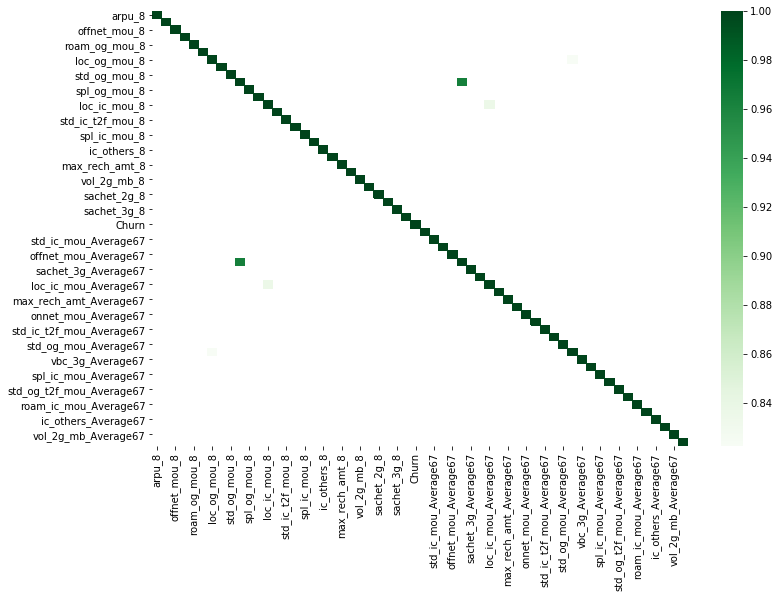

In [55]:
corr = telecom_data_high_value_customers_final.corr()

kot = corr[corr>=.8]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

## 3: Modelling

In [56]:
X = telecom_data_high_value_customers_final.drop(['Churn'], axis = 1)
y = telecom_data_high_value_customers_final['Churn']

In [57]:
# Drop Churn column 
telecom_data_high_value_customers_final.drop(['Churn'], axis = 1, inplace = True)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state= 100)

In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train )
X_test = scaler.transform(X_test)

#### Checking class imbalance

In [60]:
# Class_Balance
100*y_train.value_counts(normalize=True)

0    91.947619
1     8.052381
Name: Churn, dtype: float64

**91%** values are Non Churn values which indicates there is skewness present in the data. We need to make sure that data is not skewed as it can introduce false negatives in the predictions.

#### Balancing the data

In [61]:
#pip install imblearn
# pip install imbalanced-learn --user
from imblearn.over_sampling import SMOTE

In [62]:
sm = SMOTE()
X_train,y_train = sm.fit_sample(X_train,y_train)

In [63]:
# Class_Balance
100*y_train.value_counts(normalize=True)

1    50.0
0    50.0
Name: Churn, dtype: float64

Now, the data is now balanced.

## Model 1 : Logistic Regression

### Part 1 : Using RFE

#### Applying RFE

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [65]:
lr = LogisticRegression()

## Running RFE with 15 variables as output variables
rfe = RFE(lr, 15)
rfe_fit = rfe.fit(X_train, y_train)

In [66]:
list(zip(telecom_data_high_value_customers_final.columns,rfe.support_,rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_8', False, 18),
 ('offnet_mou_8', False, 17),
 ('roam_ic_mou_8', False, 33),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2c_mou_8', False, 27),
 ('loc_og_mou_8', False, 4),
 ('std_og_t2f_mou_8', False, 21),
 ('std_og_mou_8', True, 1),
 ('isd_og_mou_8', False, 20),
 ('spl_og_mou_8', False, 30),
 ('og_others_8', False, 25),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_t2t_mou_8', False, 7),
 ('std_ic_t2f_mou_8', False, 13),
 ('std_ic_mou_8', False, 23),
 ('spl_ic_mou_8', False, 3),
 ('isd_ic_mou_8', False, 41),
 ('ic_others_8', False, 14),
 ('total_rech_num_8', True, 1),
 ('max_rech_amt_8', False, 40),
 ('last_day_rch_amt_8', True, 1),
 ('vol_2g_mb_8', True, 1),
 ('monthly_2g_8', True, 1),
 ('sachet_2g_8', True, 1),
 ('monthly_3g_8', False, 10),
 ('sachet_3g_8', False, 11),
 ('vbc_3g_8', True, 1),
 ('aon_months', True, 1),
 ('std_ic_mou_Average67', False, 34),
 ('loc_og_t2c_mou_Average67', False, 26),
 ('offnet_mou_Average67', False, 35),
 ('isd_og_mou_Average67',

In [67]:
col = telecom_data_high_value_customers_final.columns[rfe.support_]
col

Index(['arpu_8', 'roam_og_mou_8', 'std_og_mou_8', 'loc_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'vbc_3g_8', 'aon_months', 'monthly_2g_Average67',
       'loc_ic_mou_Average67', 'loc_og_mou_Average67', 'arpu_Average67'],
      dtype='object')

In [68]:
# Creating X_test dataframe with RFE selected variables
X_rfe = pd.DataFrame(data=X_train).iloc[:, rfe.support_]
X_rfe.columns = col
y_rfe = y_train
X_rfe.head()

,arpu_8,roam_og_mou_8,std_og_mou_8,loc_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,vbc_3g_8,aon_months,monthly_2g_Average67,loc_ic_mou_Average67,loc_og_mou_Average67,arpu_Average67
0,0.152667,-0.101286,-0.503144,-0.243525,-0.751786,0.716280,-0.337356,-0.376513,-0.416085,-0.401980,2.582178,-0.463095,-0.216273,-0.633139,0.963902
1,-0.275833,-0.198433,-0.493244,0.200516,-0.536167,0.247088,0.741896,-0.376513,-0.023464,0.035010,1.209410,-0.463095,0.116931,0.066027,-0.328234
2,-0.370946,0.557164,-0.416489,-0.097432,0.002880,-0.423186,-0.337356,-0.376513,-0.416085,-0.401980,2.201087,-0.463095,-0.334328,-0.069301,-0.562543
3,0.364233,0.033695,-0.191396,4.014716,0.002880,0.247088,-0.337356,-0.376513,-0.416085,-0.401980,0.279843,-0.463095,0.125532,-0.010773,0.481081
4,-0.463214,-0.198433,-0.505410,0.810368,-0.428357,-0.423186,-0.154085,2.054843,-0.416085,0.221756,-0.967650,2.115455,0.780331,0.009945,-0.250548


### Applying Logistic Regression of RFE Features

In [69]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_fit = lr.fit(X_rfe, y_rfe)
lr_fit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]
X_test_rfe.columns = col
y_pred = lr.predict(X_test_rfe)

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6614 1637]
 [ 145  605]]


In [72]:
print('Accuracy of Logistic Regression Model on test set is ',lr.score(X_test_rfe, y_test))

Accuracy of Logistic Regression Model on test set is  0.8020219975558271


In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8251
           1       0.27      0.81      0.40       750

    accuracy                           0.80      9001
   macro avg       0.62      0.80      0.64      9001
weighted avg       0.92      0.80      0.84      9001



In [74]:
# To get the weights of all the variables
top_20_RFE_features = pd.Series(lr.coef_[0],index=col)
top_20_RFE_features = top_20_RFE_features.to_frame()
top_20_RFE_features.columns = ['Feature Importance Value']
top_20_RFE_features = top_20_RFE_features.sort_values(by = ['Feature Importance Value'],ascending = False)[:10]
top_20_RFE_features

,Feature Importance Value
arpu_Average67,0.809377
loc_ic_mou_Average67,0.622995
roam_og_mou_8,0.475929
std_og_mou_8,0.290392
monthly_2g_Average67,-0.204582
loc_og_mou_Average67,-0.299834
aon_months,-0.345443
monthly_2g_8,-0.386236
vbc_3g_8,-0.427554
last_day_rch_amt_8,-0.463117


In [75]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = telecom_data_high_value_customers_final[col].columns
vif['VIF'] = [variance_inflation_factor(telecom_data_high_value_customers_final[col].values, i) for i in range(telecom_data_high_value_customers_final[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,6.30
12,loc_ic_mou_Average67,5.87
14,arpu_Average67,5.79
3,loc_ic_mou_8,5.53
4,total_rech_num_8,3.08
13,loc_og_mou_Average67,2.19
10,aon_months,2.14
7,monthly_2g_8,1.95
11,monthly_2g_Average67,1.93
2,std_og_mou_8,1.86


In [77]:
## Dropping "loc_ic_mou_Average67" to reduce the VIF
col = col.drop('loc_ic_mou_Average67', 1)
col

Index(['arpu_8', 'roam_og_mou_8', 'std_og_mou_8', 'loc_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'vbc_3g_8', 'aon_months', 'monthly_2g_Average67',
       'loc_og_mou_Average67', 'arpu_Average67'],
      dtype='object')

In [78]:
X_rfe.head()

,arpu_8,roam_og_mou_8,std_og_mou_8,loc_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,vbc_3g_8,aon_months,monthly_2g_Average67,loc_ic_mou_Average67,loc_og_mou_Average67,arpu_Average67
0,0.152667,-0.101286,-0.503144,-0.243525,-0.751786,0.716280,-0.337356,-0.376513,-0.416085,-0.401980,2.582178,-0.463095,-0.216273,-0.633139,0.963902
1,-0.275833,-0.198433,-0.493244,0.200516,-0.536167,0.247088,0.741896,-0.376513,-0.023464,0.035010,1.209410,-0.463095,0.116931,0.066027,-0.328234
2,-0.370946,0.557164,-0.416489,-0.097432,0.002880,-0.423186,-0.337356,-0.376513,-0.416085,-0.401980,2.201087,-0.463095,-0.334328,-0.069301,-0.562543
3,0.364233,0.033695,-0.191396,4.014716,0.002880,0.247088,-0.337356,-0.376513,-0.416085,-0.401980,0.279843,-0.463095,0.125532,-0.010773,0.481081
4,-0.463214,-0.198433,-0.505410,0.810368,-0.428357,-0.423186,-0.154085,2.054843,-0.416085,0.221756,-0.967650,2.115455,0.780331,0.009945,-0.250548


In [79]:
## Dropping "loc_ic_mou_Average67" to reduce the VIF from both datasets
X_rfe.drop('loc_ic_mou_Average67', axis =1, inplace= True)
X_test_rfe.drop('loc_ic_mou_Average67', axis =1, inplace= True)

In [80]:
X_rfe.head()

,arpu_8,roam_og_mou_8,std_og_mou_8,loc_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,vbc_3g_8,aon_months,monthly_2g_Average67,loc_og_mou_Average67,arpu_Average67
0,0.152667,-0.101286,-0.503144,-0.243525,-0.751786,0.716280,-0.337356,-0.376513,-0.416085,-0.401980,2.582178,-0.463095,-0.633139,0.963902
1,-0.275833,-0.198433,-0.493244,0.200516,-0.536167,0.247088,0.741896,-0.376513,-0.023464,0.035010,1.209410,-0.463095,0.066027,-0.328234
2,-0.370946,0.557164,-0.416489,-0.097432,0.002880,-0.423186,-0.337356,-0.376513,-0.416085,-0.401980,2.201087,-0.463095,-0.069301,-0.562543
3,0.364233,0.033695,-0.191396,4.014716,0.002880,0.247088,-0.337356,-0.376513,-0.416085,-0.401980,0.279843,-0.463095,-0.010773,0.481081
4,-0.463214,-0.198433,-0.505410,0.810368,-0.428357,-0.423186,-0.154085,2.054843,-0.416085,0.221756,-0.967650,2.115455,0.009945,-0.250548


In [81]:
# Creating Linear logistics model 2
lr_2 = LogisticRegression()
lr_2_fit = lr_2.fit(X_rfe, y_rfe)
lr_2_fit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
y_pred = lr_2.predict(X_test_rfe)

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6612 1639]
 [ 147  603]]


In [84]:
# To get the weights of all the variables
top_20_RFE_features = pd.Series(lr_2.coef_[0],index=col)
top_20_RFE_features = top_20_RFE_features.to_frame()
top_20_RFE_features.columns = ['Feature Importance Value']
top_20_RFE_features = top_20_RFE_features.sort_values(by = ['Feature Importance Value'],ascending = False)[:10]
top_20_RFE_features

,Feature Importance Value
arpu_Average67,0.902346
roam_og_mou_8,0.507824
std_og_mou_8,0.282693
monthly_2g_Average67,-0.201530
loc_og_mou_Average67,-0.212335
aon_months,-0.342199
monthly_2g_8,-0.380890
vbc_3g_8,-0.426604
loc_ic_mou_8,-0.462660
last_day_rch_amt_8,-0.468719


In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = telecom_data_high_value_customers_final[col].columns
vif['VIF'] = [variance_inflation_factor(telecom_data_high_value_customers_final[col].values, i) for i in range(telecom_data_high_value_customers_final[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,6.17
13,arpu_Average67,5.61
4,total_rech_num_8,3.08
10,aon_months,2.13
12,loc_og_mou_Average67,2.09
7,monthly_2g_8,1.95
3,loc_ic_mou_8,1.94
11,monthly_2g_Average67,1.93
2,std_og_mou_8,1.86
5,last_day_rch_amt_8,1.69


In [86]:
# Still the VIF is above 5, hence dropping "arpu_Average67" to reduce the VIF

X_rfe.drop('arpu_Average67', axis =1, inplace= True)
X_test_rfe.drop('arpu_Average67', axis =1, inplace= True)

In [87]:
col = col.drop('arpu_Average67', 1)
col

Index(['arpu_8', 'roam_og_mou_8', 'std_og_mou_8', 'loc_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'vbc_3g_8', 'aon_months', 'monthly_2g_Average67',
       'loc_og_mou_Average67'],
      dtype='object')

In [88]:
lr_3 = LogisticRegression()
lr_3_fit = lr_3.fit(X_rfe, y_rfe)
lr_3_fit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
y_pred = lr_3.predict(X_test_rfe)

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6455 1796]
 [ 146  604]]


In [91]:
# To get the weights of all the variables
top_20_RFE_features = pd.Series(lr_3.coef_[0],index=col)
top_20_RFE_features = top_20_RFE_features.to_frame()
top_20_RFE_features.columns = ['Feature Importance Value']
top_20_RFE_features = top_20_RFE_features.sort_values(by = ['Feature Importance Value'],ascending = False)
top_20_RFE_features

,Feature Importance Value
roam_og_mou_8,0.582249
std_og_mou_8,0.355525
loc_og_mou_Average67,0.000326
monthly_2g_Average67,-0.224940
aon_months,-0.365274
monthly_2g_8,-0.432230
vbc_3g_8,-0.447336
loc_ic_mou_8,-0.527527
last_day_rch_amt_8,-0.534161
vol_2g_mb_8,-0.591168


In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = telecom_data_high_value_customers_final[col].columns
vif['VIF'] = [variance_inflation_factor(telecom_data_high_value_customers_final[col].values, i) for i in range(telecom_data_high_value_customers_final[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,3.63
4,total_rech_num_8,3.07
10,aon_months,2.06
12,loc_og_mou_Average67,1.97
3,loc_ic_mou_8,1.94
7,monthly_2g_8,1.93
11,monthly_2g_Average67,1.92
2,std_og_mou_8,1.85
5,last_day_rch_amt_8,1.69
8,sachet_2g_8,1.54


In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      8251
           1       0.25      0.81      0.38       750

    accuracy                           0.78      9001
   macro avg       0.61      0.79      0.63      9001
weighted avg       0.92      0.78      0.83      9001



In [94]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [95]:
# The sensitivity 
sensitivity = (TP / float(TP+FN))
sensitivity

0.8053333333333333

In [96]:
# The specificity
specificity = (TN / float(TN+FP))
specificity

0.7823294146164101

In [97]:
# The precision
precision = (TP / float(TP+FP))
precision

0.25166666666666665

In [98]:
accuracy_df = pd.DataFrame({'Model':['Logistic Regression with RFE'], 
                            'Accuracy':[round(100*lr_3.score(X_test_rfe, y_test),2)],
                            'Sensitivity': [round( 100* sensitivity,2) ],
                            'Specificity': [round( 100* specificity,2) ],
                            'Precision': [round( 100* precision,2) ]
                            
                           })
accuracy_df

,Model,Accuracy,Sensitivity,Specificity,Precision
0,Logistic Regression with RFE,78.42,80.53,78.23,25.17


### LR - RFE Model Summary

- Model accuracy is near 80%
- From confusion matrix, its clear that model is predicting large number Churn as False Postives, neeeds to be adressed.


### Part 2 : Using PCA

In [99]:
# Importing PCA
from sklearn.decomposition import PCA

pca = PCA(random_state = 100)
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [100]:
# Applying PCA on Train and Test DataSets

X_train_pca = pca.fit_transform(X_train)
print(X_train_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(38618, 57)
(9001, 57)


### Applying Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression

lr_pca = LogisticRegression()
lr_pca_fit = lr_pca.fit(X_train_pca, y_train)

In [102]:
## predicting values
y_pred = lr_pca_fit.predict(X_test_pca)

In [103]:
# Creating dataframe of predicted values
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.head()

,0
0,1
1,0
2,0
3,0
4,1


In [104]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))
confusion_matrix_pca = confusion_matrix(y_test,y_pred)

[[6718 1533]
 [ 133  617]]


In [105]:
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_pred))

Logistic Regression accuracy with PCA:  0.814909454505055


In [106]:
TP = confusion_matrix_pca[1,1] # true positive 
TN = confusion_matrix_pca[0,0] # true negatives
FP = confusion_matrix_pca[0,1] # false positives
FN = confusion_matrix_pca[1,0] # false negatives

In [107]:
# The sensitivity 
sensitivity = (TP / float(TP+FN))
sensitivity

0.8226666666666667

In [108]:
# The specificity
specificity = (TN / float(TN+FP))
specificity

0.814204338868016

In [109]:
# The precision
precision = (TP / float(TP+FP))
precision

0.2869767441860465

In [110]:
temp_accuracy_df = pd.DataFrame({'Model':['Logistic Regression With PCA (Default)'], 
                            'Accuracy':[round(100*accuracy_score(y_test,y_pred),2)],
                            'Sensitivity': [round( 100* sensitivity,2) ],
                            'Specificity': [round( 100* specificity,2) ],
                            'Precision': [round( 100* precision,2) ]
                           })
accuracy_df = pd.concat([accuracy_df, temp_accuracy_df])
accuracy_df

,Model,Accuracy,Sensitivity,Specificity,Precision
0,Logistic Regression with RFE,78.42,80.53,78.23,25.17
0,Logistic Regression With PCA (Default),81.49,82.27,81.42,28.70


In [111]:
## Mapping the features with the PCA Components
col = list(telecom_data_high_value_customers_final.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC1,PC2,PC3,Feature
0,0.228871,0.162393,0.166355,arpu_8
1,0.110176,0.220463,-0.036667,onnet_mou_8
2,0.132478,0.197675,0.039913,offnet_mou_8
3,0.321441,-0.228124,-0.237446,roam_ic_mou_8
4,0.364854,-0.137563,-0.147414,roam_og_mou_8
5,0.014437,0.070751,-0.006906,loc_og_t2c_mou_8
6,0.061416,0.098041,0.169136,loc_og_mou_8
7,0.042810,0.007482,0.085343,std_og_t2f_mou_8
8,0.084869,0.278986,-0.078999,std_og_mou_8
9,0.058081,0.047763,0.072359,isd_og_mou_8


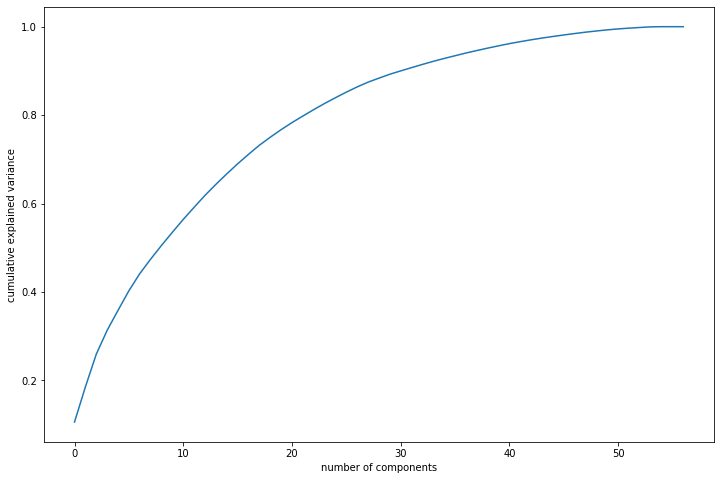

In [112]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [113]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 10.59,  18.52,  25.92,  31.32,  35.84,  40.27,  44.14,  47.41,
        50.52,  53.5 ,  56.4 ,  59.15,  61.84,  64.32,  66.69,  68.97,
        71.11,  73.17,  74.98,  76.69,  78.29,  79.77,  81.22,  82.61,
        83.92,  85.18,  86.37,  87.45,  88.35,  89.23,  89.99,  90.73,
        91.46,  92.16,  92.8 ,  93.42,  94.03,  94.6 ,  95.14,  95.66,
        96.16,  96.61,  97.03,  97.42,  97.78,  98.12,  98.45,  98.76,
        99.03,  99.28,  99.5 ,  99.68,  99.83,  99.97, 100.01, 100.01,
       100.01])

34 Features explain around **90.13%** variance in the data, hence we will apply PCA using 32 components.

In [114]:
pca_34 = PCA(n_components = 34)

In [115]:
# Applying PCA on Train and Test DataSets

X_train_pca_34 = pca_34.fit_transform(X_train)
print(X_train_pca_34.shape)

X_test_pca_34 = pca_34.transform(X_test)
print(X_test_pca_34.shape)

(38618, 34)
(9001, 34)


### Applying  Logistic Regression on 34 Features

In [116]:
from sklearn.linear_model import LogisticRegression

lr_pca_34 = LogisticRegression()
lr_pca_34_fit = lr_pca_34.fit(X_train_pca_34, y_train)

In [117]:
## predicting values
y_pred_34 = lr_pca_34.predict(X_test_pca_34)

In [118]:
# Creating dataframe of predicted values
y_pred_34_df = pd.DataFrame(y_pred_34)
y_pred_34_df.head()

,0
0,1
1,0
2,0
3,0
4,1


In [119]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred_34_df))
confusion_matrix_pca_34 = confusion_matrix(y_test,y_pred_34_df)

[[6628 1623]
 [ 142  608]]


In [120]:
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_pred_34_df))

Logistic Regression accuracy with PCA:  0.8039106765914898


In [121]:
TP = confusion_matrix_pca_34[1,1] # true positive 
TN = confusion_matrix_pca_34[0,0] # true negatives
FP = confusion_matrix_pca_34[0,1] # false positives
FN = confusion_matrix_pca_34[1,0] # false negatives

In [122]:
# The sensitivity 
sensitivity = (TP / float(TP+FN))
sensitivity

0.8106666666666666

In [123]:
# The specificity
specificity = (TN / float(TN+FP))
specificity

0.8032965701127136

In [124]:
# The precision
precision = (TP / float(TP+FP))
precision

0.2725235320484088

In [125]:
temp_accuracy_df = pd.DataFrame({'Model':['Logistic Regression With PCA (34 Components)'], 
                            'Accuracy':[round(100*accuracy_score(y_test,y_pred_34_df),2)],
                            'Sensitivity': [round( 100* sensitivity,2) ],
                            'Specificity': [round( 100* specificity,2) ],
                            'Precision': [round( 100* precision,2) ]
                           })

accuracy_df = pd.concat([accuracy_df, temp_accuracy_df])
accuracy_df

,Model,Accuracy,Sensitivity,Specificity,Precision
0,Logistic Regression with RFE,78.42,80.53,78.23,25.17
0,Logistic Regression With PCA (Default),81.49,82.27,81.42,28.70
0,Logistic Regression With PCA (34 Components),80.39,81.07,80.33,27.25


### PCA Summary

- Around 34 Components explain 90% Variance in the data.
- Model has 85% Accuracy
- Main features include arpu_8, onnet_mou_8, offnet_mou_8

## Model 2 : Decision Tree

In [126]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

#### Feature reduction using LASSO

In [127]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

linear_svc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(linear_svc, prefit=True)
X_lasso = model.transform(X_train)
pos = model.get_support(indices=True)

#Shape of selected features
print(X_lasso.shape)

# Position of selected features
print(pos)

(38618, 28)
[ 0  1  3  4  8 12 15 16 19 20 21 22 23 24 25 27 28 30 34 35 37 43 44 48
 51 52 55 56]


In [128]:
# Features for the Decision Tree

dt_features = list(telecom_data_high_value_customers_final.columns[pos])
dt_features

['arpu_8',
 'onnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'std_og_mou_8',
 'loc_ic_mou_8',
 'std_ic_mou_8',
 'spl_ic_mou_8',
 'total_rech_num_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'vbc_3g_8',
 'aon_months',
 'loc_og_t2c_mou_Average67',
 'monthly_2g_Average67',
 'loc_ic_mou_Average67',
 'max_rech_amt_Average67',
 'std_og_mou_Average67',
 'loc_og_mou_Average67',
 'total_rech_num_Average67',
 'roam_ic_mou_Average67',
 'arpu_Average67',
 'vol_2g_mb_Average67',
 'roam_og_mou_Average67']

#### Decision Tree with default parameters

In [129]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_lasso, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [130]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, pos]

y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93      8251
           1       0.36      0.75      0.49       750

    accuracy                           0.87      9001
   macro avg       0.67      0.82      0.71      9001
weighted avg       0.92      0.87      0.89      9001



In [131]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
confusion_matrix_dt_defaut = confusion_matrix(y_test,y_pred_default)

[[7262  989]
 [ 187  563]]


In [132]:
print("Accuracy of Decsion Tree with default params is:", accuracy_score(y_test,y_pred_default))

Accuracy of Decsion Tree with default params is: 0.8693478502388623


In [133]:
TP = confusion_matrix_dt_defaut[1,1] # true positive 
TN = confusion_matrix_dt_defaut[0,0] # true negatives
FP = confusion_matrix_dt_defaut[0,1] # false positives
FN = confusion_matrix_dt_defaut[1,0] # false negatives

In [134]:
# The sensitivity 
sensitivity_default = (TP / float(TP+FN))
sensitivity_default

0.7506666666666667

In [135]:
# The specificity
specificity_default = (TN / float(TN+FP))
specificity_default

0.8801357411222882

In [136]:
# The precision
precision_default = (TP / float(TP+FP))
precision_default

0.3627577319587629

In [137]:
## Creating DataFrame for accuracy of all the models

temp_accuracy_df = pd.DataFrame({'Model':['Decision Tree (Default)'], 
                            'Accuracy':[round(100*accuracy_score(y_test,y_pred_default),2)],
                            'Sensitivity': [round( 100* sensitivity_default,2) ],
                            'Specificity': [round( 100* specificity_default,2) ],
                            'Precision': [round( 100* precision_default,2) ]
                           })
accuracy_df = pd.concat([accuracy_df, temp_accuracy_df ])
accuracy_df

,Model,Accuracy,Sensitivity,Specificity,Precision
0,Logistic Regression with RFE,78.42,80.53,78.23,25.17
0,Logistic Regression With PCA (Default),81.49,82.27,81.42,28.70
0,Logistic Regression With PCA (34 Components),80.39,81.07,80.33,27.25
0,Decision Tree (Default),86.93,75.07,88.01,36.28


#### Decision Tree with Hyperparameter Tuning

##### 1. Tuning Max Depth

In [138]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dt = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",  return_train_score=True)
tree.fit(X_lasso, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
 

In [139]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.133360,0.035327,0.002800,0.000400,1,{'max_depth': 1},0.816805,0.847359,0.853055,0.851224,0.849799,0.843648,0.013550,38,0.850359,0.842720,0.841296,0.841754,0.842110,0.843648,0.003388
1,0.210530,0.002049,0.002597,0.000493,2,{'max_depth': 2},0.816805,0.847359,0.850984,0.843714,0.849540,0.841680,0.012677,39,0.850359,0.842720,0.843271,0.845088,0.842272,0.844742,0.002967
2,0.304506,0.007199,0.002200,0.000400,3,{'max_depth': 3},0.839979,0.866649,0.879855,0.869351,0.873106,0.865788,0.013645,37,0.873212,0.866220,0.863080,0.865739,0.864865,0.866623,0.003464
3,0.385880,0.004697,0.002798,0.000399,4,{'max_depth': 4},0.852279,0.875324,0.884645,0.871035,0.876214,0.871899,0.010757,36,0.881530,0.874798,0.871852,0.876938,0.871338,0.875291,0.003724
4,0.470049,0.003814,0.002200,0.000400,5,{'max_depth': 5},0.858105,0.882703,0.892413,0.879580,0.886961,0.879953,0.011742,35,0.890820,0.883473,0.879815,0.884965,0.882279,0.884270,0.003683


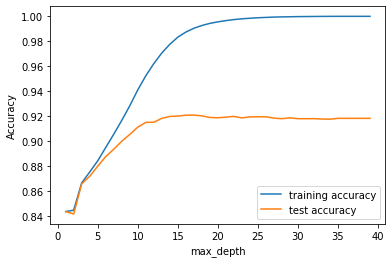

In [140]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From the graph, optimal value of max_depth is 10 

##### 2. Tuning Min Samples Leaf

In [141]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",  return_train_score=True)
tree.fit(X_lasso, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             p

In [142]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.286384,0.046117,0.003600,0.000800,5,{'min_samples_leaf': 5},0.879208,0.919731,0.925945,0.917778,0.921922,0.912917,0.017072,1,0.972260,0.965786,0.966498,0.966370,0.967568,0.967696,0.002353
1,1.151367,0.075434,0.003200,0.000400,25,{'min_samples_leaf': 25},0.872216,0.911833,0.914811,0.905736,0.910915,0.903102,0.015718,2,0.930504,0.924807,0.924969,0.926137,0.925328,0.926349,0.002128
2,0.955678,0.031218,0.004404,0.001853,45,{'min_samples_leaf': 45},0.872605,0.901476,0.907043,0.896672,0.907031,0.896965,0.012781,3,0.917524,0.910630,0.911633,0.912737,0.913028,0.913110,0.002365
3,0.894196,0.028815,0.002996,0.000008,65,{'min_samples_leaf': 65},0.866649,0.895650,0.901217,0.893953,0.898873,0.891269,0.012564,4,0.911957,0.902991,0.904059,0.906263,0.904095,0.905873,0.003223
4,0.929130,0.135163,0.003199,0.000399,85,{'min_samples_leaf': 85},0.867167,0.896297,0.900311,0.893435,0.892140,0.889870,0.011693,5,0.907555,0.898783,0.898912,0.900016,0.898009,0.900655,0.003509


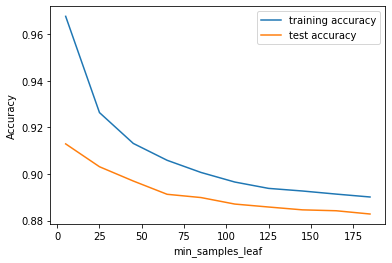

In [143]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Optimal value for min_samples_leaf seems to be 25

##### 3. Tuning min_samples_split

In [144]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",  return_train_score=True)
tree.fit(X_lasso, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             

In [145]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.424404,0.056935,0.003200,0.000401,5,{'min_samples_split': 5},0.886717,0.925168,0.928793,0.922569,0.925418,0.917733,0.015634,1,0.995112,0.994433,0.993979,0.993915,0.994044,0.994297,0.000446
1,1.466115,0.109532,0.003803,0.000402,25,{'min_samples_split': 25},0.872864,0.917789,0.922320,0.918814,0.921015,0.910560,0.018916,2,0.969217,0.961546,0.963035,0.963133,0.964493,0.964285,0.002637
2,1.421168,0.071185,0.003604,0.000494,45,{'min_samples_split': 45},0.869368,0.917400,0.919731,0.913764,0.916742,0.907401,0.019112,3,0.953065,0.942578,0.947822,0.948697,0.946690,0.947770,0.003377
3,1.447207,0.066119,0.003999,0.000633,65,{'min_samples_split': 65},0.868203,0.914940,0.917400,0.908455,0.914541,0.904708,0.018489,4,0.943970,0.936007,0.937561,0.939311,0.937110,0.938792,0.002799
4,1.375027,0.062839,0.003397,0.000496,85,{'min_samples_split': 85},0.863801,0.910668,0.911963,0.903017,0.910527,0.899995,0.018369,5,0.936751,0.928271,0.929469,0.929179,0.929277,0.930589,0.003109


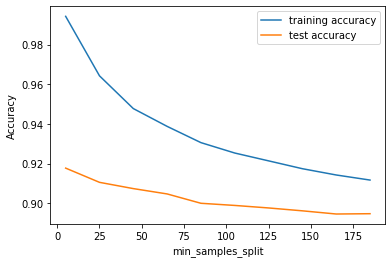

In [146]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_samples_spliit = 50 is looking optimal

##### 4. Grid Search to find optimal parameter values

In [147]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_lasso,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [148]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.796875,0.030773,0.003008,8.550689e-06,entropy,5,25,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.856551,0.879726,0.883480,0.879063,0.886184,0.877001,0.010547,23,0.886839,0.880397,0.875218,0.881599,0.879560,0.880723,0.003740
1,0.786686,0.016414,0.003199,7.477676e-04,entropy,5,25,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.856551,0.879726,0.883480,0.879063,0.886184,0.877001,0.010547,23,0.886839,0.880397,0.875218,0.881599,0.879560,0.880723,0.003740
2,0.778842,0.011527,0.002809,4.009390e-04,entropy,5,75,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.857198,0.880243,0.883480,0.880357,0.886055,0.877467,0.010361,21,0.886030,0.879880,0.875218,0.880531,0.878977,0.880127,0.003478
3,0.826378,0.078960,0.002598,4.892855e-04,entropy,5,75,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.857198,0.880243,0.883480,0.880357,0.886055,0.877467,0.010361,21,0.886030,0.879880,0.875218,0.880531,0.878977,0.880127,0.003478
4,0.777214,0.049145,0.002803,3.926758e-04,entropy,5,125,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.857069,0.880243,0.884516,0.880098,0.887091,0.877803,0.010700,19,0.885609,0.879880,0.876805,0.881372,0.879625,0.880658,0.002883
5,0.750429,0.006219,0.002995,6.326959e-04,entropy,5,125,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.857069,0.880243,0.884516,0.880098,0.887091,0.877803,0.010700,19,0.885609,0.879880,0.876805,0.881372,0.879625,0.880658,0.002883
6,1.326949,0.095490,0.003600,1.199866e-03,entropy,10,25,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.874417,0.903159,0.906784,0.902629,0.903794,0.898157,0.011956,3,0.923869,0.919305,0.916618,0.920214,0.914646,0.918930,0.003158
7,1.270441,0.014245,0.003000,4.422006e-07,entropy,10,25,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.868074,0.905230,0.902123,0.899262,0.904053,0.895748,0.013984,4,0.918787,0.914676,0.912022,0.913902,0.912542,0.914386,0.002395
8,1.204824,0.024822,0.003401,4.910938e-04,entropy,10,75,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.866390,0.897462,0.903936,0.896025,0.899262,0.892615,0.013381,5,0.908429,0.902182,0.901243,0.903997,0.902962,0.903762,0.002503
9,1.245056,0.079874,0.003201,3.989423e-04,entropy,10,75,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.865873,0.897333,0.903936,0.896025,0.899262,0.892486,0.013574,6,0.909238,0.901923,0.901243,0.903997,0.902962,0.903873,0.002841


In [149]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9008495342320547
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


**Running the model with best parameters obtained from grid search.**

In [150]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
clf_gini.fit(X_lasso, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [151]:
lst = list( zip(telecom_data_high_value_customers_final.columns, clf_gini.feature_importances_))
decision_tree_important_features = pd.DataFrame(lst)
decision_tree_important_features.columns =['Feature', 'Feature Importance value']
decision_tree_important_features=  decision_tree_important_features.sort_values(by=['Feature Importance value'], ascending = False)[:10]
decision_tree_important_features

,Feature,Feature Importance value
3,roam_ic_mou_8,0.619339
9,isd_og_mou_8,0.080326
0,arpu_8,0.058369
10,spl_og_mou_8,0.029422
5,loc_og_t2c_mou_8,0.026900
8,std_og_mou_8,0.018964
11,og_others_8,0.017270
6,loc_og_mou_8,0.016474
2,offnet_mou_8,0.015292
21,last_day_rch_amt_8,0.013182


In [152]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      8251
           1       0.39      0.74      0.51       750

    accuracy                           0.88      9001
   macro avg       0.68      0.82      0.72      9001
weighted avg       0.93      0.88      0.90      9001



In [153]:
# confusion matrix
confusion_matrix_dt = confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))

[[7401  850]
 [ 196  554]]


In [154]:
# accuracy score
print("The Accuracy of Decision Trees after using Optimal Params is:" , clf_gini.score(X_test,y_test))

The Accuracy of Decision Trees after using Optimal Params is: 0.8837906899233419


In [155]:
TP = confusion_matrix_dt[1,1] # true positive 
TN = confusion_matrix_dt[0,0] # true negatives
FP = confusion_matrix_dt[0,1] # false positives
FN = confusion_matrix_dt[1,0] # false negatives

In [156]:
# The sensitivity 
sensitivity_dt = (TP / float(TP+FN))
sensitivity_dt

0.7386666666666667

In [157]:
# The specificity
specificity_dt = (TN / float(TN+FP))
specificity_dt

0.8969821839776997

In [158]:
# The precision
precision_dt = (TP / float(TP+FP))
precision_dt

0.3945868945868946

In [159]:
temp_accuracy_df = pd.DataFrame({'Model':['Decision Tree (Hyperparameter)'], 
                            'Accuracy':[round(100* clf_gini.score(X_test,y_test), 2)],
                            'Sensitivity': [round( 100* sensitivity_dt,2) ],
                            'Specificity': [round( 100* specificity_dt,2) ],
                                 'Precision': [round( 100* precision_dt,2) ]
                           })

accuracy_df = pd.concat([accuracy_df, temp_accuracy_df ])
accuracy_df

,Model,Accuracy,Sensitivity,Specificity,Precision
0,Logistic Regression with RFE,78.42,80.53,78.23,25.17
0,Logistic Regression With PCA (Default),81.49,82.27,81.42,28.70
0,Logistic Regression With PCA (34 Components),80.39,81.07,80.33,27.25
0,Decision Tree (Default),86.93,75.07,88.01,36.28
0,Decision Tree (Hyperparameter),88.38,73.87,89.70,39.46


### Decision Tree : Summary

- Getting around 89% Accuracy
- Still many false positives are present in the model.
- After Feature elimination using Lasso, 34 Features were used.

## Model 3 : Random Forests

#### Random Forest with Default Hyperparameters

We will continue using features given by Lasso.

In [160]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [161]:
# fit
rfc.fit(X_lasso,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [162]:
# Making predictions
predictions = rfc.predict(X_test)

In [163]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Let's check the report of default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8251
           1       0.60      0.67      0.63       750

    accuracy                           0.94      9001
   macro avg       0.79      0.81      0.80      9001
weighted avg       0.94      0.94      0.94      9001



In [164]:
print("Random Forest Accuracy with default paramters is ",(accuracy_score(y_test,predictions)) )

Random Forest Accuracy with default paramters is  0.9353405177202533


In [165]:
#confusion matrix
confusion_matrix_rf = confusion_matrix(y_test,predictions)
print(confusion_matrix(y_test,predictions))

[[7918  333]
 [ 249  501]]


In [166]:
TP = confusion_matrix_rf[1,1] # true positive 
TN = confusion_matrix_rf[0,0] # true negatives
FP = confusion_matrix_rf[0,1] # false positives
FN = confusion_matrix_rf[1,0] # false negatives

In [167]:
# The sensitivity 
sensitivity_rf = (TP / float(TP+FN))
sensitivity_rf

0.668

In [168]:
# The specificity
specificity_rf = (TN / float(TN+FP))
specificity_rf

0.9596412556053812

In [169]:
# The precision
precision_rf = (TP / float(TP+FP))
precision_rf

0.6007194244604317

In [170]:
temp_accuracy_df = pd.DataFrame({'Model':['Random Forest (Default)'], 
                            'Accuracy':[round(100* accuracy_score(y_test,predictions), 2)],
                            'Sensitivity': [round( 100* sensitivity_rf,2) ],
                            'Specificity': [round( 100* specificity_rf,2) ],
                                 'Precision': [round( 100* precision_rf,2) ]
                           })

accuracy_df = pd.concat([accuracy_df, temp_accuracy_df ])
accuracy_df

,Model,Accuracy,Sensitivity,Specificity,Precision
0,Logistic Regression with RFE,78.42,80.53,78.23,25.17
0,Logistic Regression With PCA (Default),81.49,82.27,81.42,28.70
0,Logistic Regression With PCA (34 Components),80.39,81.07,80.33,27.25
0,Decision Tree (Default),86.93,75.07,88.01,36.28
0,Decision Tree (Hyperparameter),88.38,73.87,89.70,39.46
0,Random Forest (Default),93.53,66.80,95.96,60.07


#### Hyperparameter Tuning for Random Forest

##### 1. Tuning max_depth

In [171]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters,   cv=n_folds,  scoring="accuracy", return_train_score=True)
rf.fit(X_lasso, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [172]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.139329,0.250061,0.074983,0.002761,2,{'max_depth': 2},0.831176,0.865743,0.867038,0.862489,0.872847,0.859859,0.014728,4,0.862012,0.863533,0.854535,0.856449,0.863991,0.860104,0.003870
1,7.928756,0.182534,0.105252,0.001710,7,{'max_depth': 7},0.882833,0.912092,0.917271,0.908326,0.914153,0.906935,0.012397,3,0.922121,0.913802,0.912637,0.914161,0.914970,0.915538,0.003376
2,11.818861,0.505867,0.146457,0.001790,12,{'max_depth': 12},0.913905,0.945624,0.951450,0.946135,0.946523,0.940727,0.013574,2,0.971548,0.967890,0.967469,0.966402,0.967956,0.968253,0.001739
3,13.605807,0.050352,0.166101,0.003611,17,{'max_depth': 17},0.930735,0.959736,0.965821,0.959990,0.960378,0.955332,0.012502,1,0.993753,0.993494,0.993332,0.992782,0.993397,0.993352,0.000319


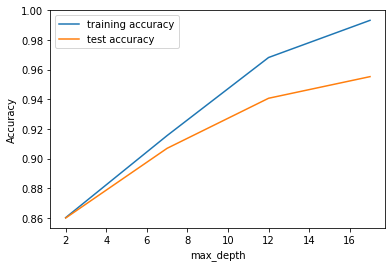

In [173]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus we will choose max_depth value to be 10

##### 2. Tuning  n_estimators

In [174]:
# GridSearchCV to find optimal n_estimators
#from sklearn.model_selection import KFold
#from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
#n_folds = 5

# parameters to build the model on
#parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
#rf = RandomForestClassifier(max_depth=10)


# fit tree on training data
#rf = GridSearchCV(rf, parameters, 
#                    cv=n_folds, 
#                   scoring="accuracy", return_train_score=True)
#rf.fit(X_lasso, y_train)

Runnnig above code takes more than 15 mins and produces below output.
To save the time we have commented the code for finding optimal n_estimators

In [175]:
# scores of GridSearch CV
#scores = rf.cv_results_
#pd.DataFrame(scores).head()

In [176]:
# plotting accuracies with n_estimators
#plt.figure()
#plt.plot(scores["param_n_estimators"], 
#         scores["mean_train_score"], 
#         label="training accuracy")
#plt.plot(scores["param_n_estimators"], 
#         scores["mean_test_score"], 
#         label="test accuracy")
#plt.xlabel("n_estimators")
#plt.ylabel("Accuracy")
#plt.legend()
#plt.show()

##### 3. Tuning max_features

In [177]:
# specify number of folds for k-fold CV
#n_folds = 5

# parameters to build the model on
#parameters = {'max_features': [5, 10, 15, 20, 25, 30]}

# instantiate the model
#rf = RandomForestClassifier(max_depth=10)


# fit tree on training data
#rf = GridSearchCV(rf, parameters, 
#                    cv=n_folds, 
#                   scoring="accuracy", return_train_score=True)
#rf.fit(X_lasso, y_train)

Tuning max_features also takes more than 10 mins locally, hence we commented the code. Below is the output we obtained.

In [178]:
# scores of GridSearch CV
#scores = rf.cv_results_
#pd.DataFrame(scores).head()

In [179]:
# plotting accuracies with max_features
#plt.figure()
#plt.plot(scores["param_max_features"], 
#         scores["mean_train_score"], 
#         label="training accuracy")
#plt.plot(scores["param_max_features"], 
#         scores["mean_test_score"], 
#         label="test accuracy")
#plt.xlabel("max_features")
#plt.ylabel("Accuracy")
#plt.legend()
#plt.show()

##### 4.Tuning min_samples_leaf

In [180]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_lasso, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [181]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.481698,0.319087,0.129978,0.003146,100,{'min_samples_leaf': 100},0.875194,0.909114,0.911186,0.904182,0.909621,0.901859,0.013537,1,0.914190,0.905677,0.905677,0.905907,0.905324,0.907355,0.003423
1,8.615987,0.097223,0.126844,0.011277,150,{'min_samples_leaf': 150},0.869627,0.901346,0.906525,0.899650,0.903794,0.896189,0.013482,2,0.907943,0.899625,0.899268,0.900081,0.899013,0.901186,0.003398
2,8.215026,0.184928,0.117777,0.002399,200,{'min_samples_leaf': 200},0.867815,0.897592,0.899793,0.897579,0.902629,0.893081,0.012768,3,0.902246,0.894704,0.894122,0.897297,0.894902,0.896654,0.002999
3,7.768371,0.207878,0.119920,0.013569,250,{'min_samples_leaf': 250},0.867297,0.893837,0.900958,0.897061,0.899650,0.891761,0.012472,4,0.900855,0.893151,0.891727,0.894061,0.892377,0.894434,0.003304
4,7.394500,0.145688,0.109906,0.001286,300,{'min_samples_leaf': 300},0.864319,0.889953,0.897851,0.893306,0.897061,0.888498,0.012415,5,0.896452,0.889493,0.889137,0.891050,0.890727,0.891372,0.002640


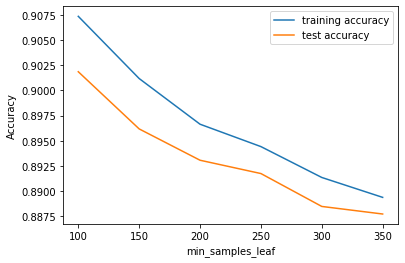

In [182]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### 5.Tuning min_samples_split

In [183]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",  return_train_score=True)
rf.fit(X_lasso, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [184]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.505225,0.233191,0.141290,0.001379,200,{'min_samples_split': 200},0.884904,0.919860,0.921025,0.915188,0.918296,0.911855,0.013617,1,0.928853,0.919531,0.918366,0.918628,0.918789,0.920834,0.004029
1,12.555877,1.138944,0.138359,0.006150,250,{'min_samples_split': 250},0.881538,0.914423,0.916882,0.913246,0.916354,0.908489,0.013539,2,0.924548,0.913770,0.913834,0.914582,0.915973,0.916542,0.004081
2,11.972879,0.478710,0.136762,0.001597,300,{'min_samples_split': 300},0.878301,0.912351,0.915717,0.908326,0.914541,0.905847,0.014002,3,0.919855,0.911471,0.910727,0.910956,0.912478,0.913098,0.003432
3,11.542405,0.218209,0.139758,0.012619,350,{'min_samples_split': 350},0.876489,0.910668,0.912610,0.909232,0.912081,0.904216,0.013913,4,0.917913,0.908623,0.907555,0.909112,0.908205,0.910281,0.003850
4,11.842412,0.159813,0.132556,0.002942,400,{'min_samples_split': 400},0.875324,0.907302,0.911833,0.905218,0.910398,0.902015,0.013545,5,0.915194,0.906649,0.905969,0.906522,0.906716,0.908210,0.003502


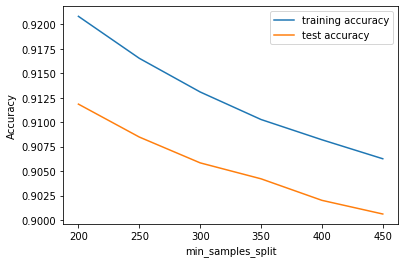

In [185]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### 6. Grid Search to Find Optimal Hyperparameters

**Finding Optimal Hyperparamter code took more than more than 7 Hrs, Hence commenting this part of the code**

In [186]:
# Create the parameter grid based on the results of random search 
#param_grid = {
#    'max_depth': [4,8,10],
#    'min_samples_leaf': range(100, 300, 100),
#    'min_samples_split': range(200, 500, 100),
#    'n_estimators': [500,700], 
#    'max_features': [10,20,25]
#}

# Create a based model
#rf = RandomForestClassifier()
# Instantiate the grid search model
#grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                          cv = 3, n_jobs = -1,verbose = 1,  return_train_score=True)

In [187]:
# Fit the grid search to the data
#grid_search.fit(X_lasso, y_train)

**Below Output was obtained after succesful run of the code**

**Fitting the final model with the best parameters obtained from grid search.**

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_jobs = -1,
                                  n_estimators=1000 ,
                                  random_state =100,
                                  max_features = 15
                                  )
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

In [189]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [190]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5493
           1       0.75      0.38      0.51       508

    accuracy                           0.94      6001
   macro avg       0.85      0.69      0.74      6001
weighted avg       0.93      0.94      0.93      6001



In [191]:
#confusion matrix
confusion_matrix_rf_hyperparameter = confusion_matrix(y_test,prediction_test)
print(confusion_matrix(y_test,prediction_test))

[[5428   65]
 [ 314  194]]


In [192]:
# accuracy score
print ('Accuracy Score for Random Forest Final Model :',metrics.accuracy_score(y_test, prediction_test))

Accuracy Score for Random Forest Final Model : 0.9368438593567738


In [193]:
TP = confusion_matrix_rf_hyperparameter[1,1] # true positive 
TN = confusion_matrix_rf_hyperparameter[0,0] # true negatives
FP = confusion_matrix_rf_hyperparameter[0,1] # false positives
FN = confusion_matrix_rf_hyperparameter[1,0] # false negatives

In [194]:
# The sensitivity 
sensitivity_rf_hyperparameter = (TP / float(TP+FN))
sensitivity_rf_hyperparameter

0.38188976377952755

In [195]:
# The specificity
specificity_rf_hyperparameter = (TN / float(TN+FP))
specificity_rf_hyperparameter

0.9881667576916076

In [196]:
# The precision
precision_rf_hyperparameter = (TP / float(TP+FP))
precision_rf_hyperparameter

0.749034749034749

In [197]:
temp_accuracy_df = pd.DataFrame({'Model':['Random Forest (Hyperparamter)'], 
                            'Accuracy':[round(100* metrics.accuracy_score(y_test, prediction_test), 2)],
                            'Sensitivity': [round( 100* sensitivity_rf_hyperparameter,2) ],
                            'Specificity': [round( 100* specificity_rf_hyperparameter,2) ],
                            'Precision': [round( 100* precision_rf_hyperparameter,2) ]
                           })

accuracy_df = pd.concat([accuracy_df, temp_accuracy_df ])
accuracy_df

,Model,Accuracy,Sensitivity,Specificity,Precision
0,Logistic Regression with RFE,78.42,80.53,78.23,25.17
0,Logistic Regression With PCA (Default),81.49,82.27,81.42,28.70
0,Logistic Regression With PCA (34 Components),80.39,81.07,80.33,27.25
0,Decision Tree (Default),86.93,75.07,88.01,36.28
0,Decision Tree (Hyperparameter),88.38,73.87,89.70,39.46
0,Random Forest (Default),93.53,66.80,95.96,60.07
0,Random Forest (Hyperparamter),93.68,38.19,98.82,74.90


In [198]:
X = telecom_data_high_value_customers_final
# Scaling all the variables to a range of 0 to 1
#from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
X = pd.DataFrame(scaler.transform(X))
X.columns = features

importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights = weights.to_frame()
weights.columns = ['Feature Importance Value']
weights = weights.sort_values(by = ['Feature Importance Value'],ascending = False)[:10]
weights

,Feature Importance Value
arpu_8,0.178502
max_rech_amt_8,0.147457
isd_og_mou_8,0.107737
roam_og_mou_8,0.105835
loc_ic_mou_8,0.085043
spl_ic_mou_8,0.056460
roam_ic_mou_8,0.041508
last_day_rch_amt_8,0.040322
isd_ic_mou_8,0.033582
loc_og_mou_8,0.025682


Above are the **TOP 10** features those contribute most in the prediction if a customer will Churn or not.

### Random Forest : Summary

- Ranodm Forest predict values with 93% Accuracy but Sensitivity of Random Forest is only 43%
- Parameters like total incoming call, total outgoing calls, average revenue for the 8th Month are the top predictors.
- These results are in-line with the results which we obtained from the Logistic Regression.

## Telecom Churn : Summary

To identify the customers who will churn ased on their action in 6,7 and 8th Month, wee built the models. Below is the performance of each model.

In [199]:
accuracy_df

,Model,Accuracy,Sensitivity,Specificity,Precision
0,Logistic Regression with RFE,78.42,80.53,78.23,25.17
0,Logistic Regression With PCA (Default),81.49,82.27,81.42,28.70
0,Logistic Regression With PCA (34 Components),80.39,81.07,80.33,27.25
0,Decision Tree (Default),86.93,75.07,88.01,36.28
0,Decision Tree (Hyperparameter),88.38,73.87,89.70,39.46
0,Random Forest (Default),93.53,66.80,95.96,60.07
0,Random Forest (Hyperparamter),93.68,38.19,98.82,74.90


In case of telecom study, it is more important to identify the **Churners** than the **Non-Churners**, hence we will be taking **sensitivity** of each model in to consideration when we opt the final model. 

Logistic Regression Model produce the optimal value of Sensitivity which is 80-83% using techniques like RFE and PCA.

Decision Tree produces more accuracy but it affect the Sensitivity of the model due to which we will not opt Decision Tree. Same is the case for Random Forest. Even after tuning the random forests, sensitivity of model falls below 50%. Hence we are not using both Random Forest and Decision Tree algorithm for final predictions.

### Top Predictors: 

Text(0.5, 1.0, 'Logistic Regression : Feature Importance using RFE')

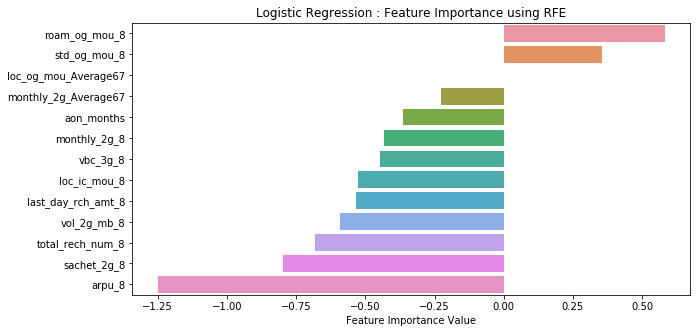

In [200]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Feature Importance Value', y=top_20_RFE_features.index, data=top_20_RFE_features)
plt.title('Logistic Regression : Feature Importance using RFE')

Text(0.5, 1.0, ' Decision Tree : Feature Importance')

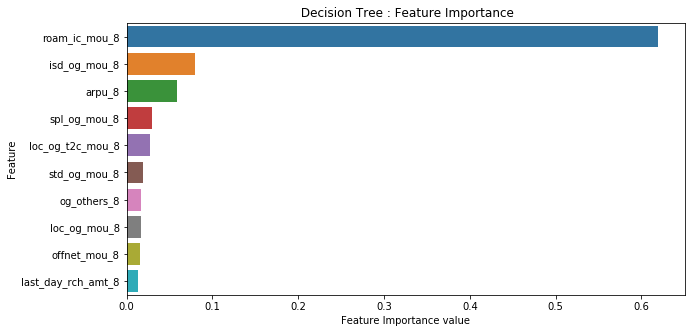

In [201]:
plt.figure(figsize=(10,5))
ax = sns.barplot(y='Feature',
                 x='Feature Importance value', 
                 data=decision_tree_important_features)
plt.title(' Decision Tree : Feature Importance')

Text(0.5, 1.0, 'Random Forest : Feature Importance')

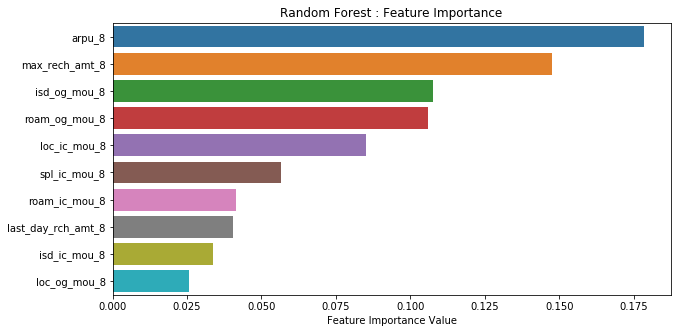

In [202]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Feature Importance Value', y=weights.index, data=weights)
plt.title('Random Forest : Feature Importance')

From the results obtained in **Logistic Regression (RFE), Decision Tree** and **Random Forest**, below are the observations:

- `Behaviour of customer in the 8th Month` can be the base for Churn Analysis as most of the predictors are for 8th Month.
- `Local Incoming and Outgoing Calls for 8th Month and Average Revenue in 8th Month` are strong indicators of Churn Behaviour
- `Std Outgoing Calls and Revenue Per Customer` are strong indicators of Churn.
- `Max Recharge Amount` is also a good predictor.

### Strategies to manage customer churn

1. Constant monitoring of HVC and engage with the customer on every 10% drop in avg consumption on a weekly/10 days rolling window. It would help in understanding if there are any issues behind the drop in usage. 
2. Sell more bundles of services to customers. The more services customer engages in much less likely is the Churn.
3. Postpaid customers are less likely to churn so incentivize customer conversions from Prepaid to Postpaid.